In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.patches import Rectangle
from pylab import *
import matplotlib.ticker as ticker

# 字体和大小
plt.rc('font', family='Times New Roman')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["axes.titleweight"] = "bold"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42



In [7]:
error01_data = np.loadtxt("./data/evolution_ALLC_ALLD_frequncey.csv",delimiter=',')
error001_data = np.loadtxt("./data/evolution_MCSUC_ALLC_ALLD_frequncey.csv",delimiter=',')

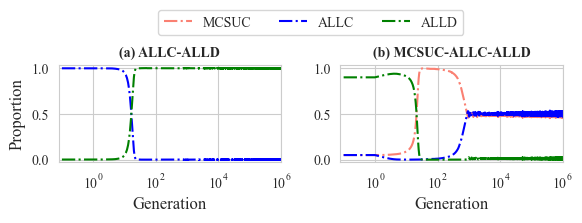

In [38]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.rcParams["font.family"] = "Times New Roman"

def plot_data(data, ax, label, show_ylabel=True):
    x = [10**-1] + list(range(1, len(data) + 1))

    data = np.vstack((data[0], data))

    if data.shape[1] == 2: 
        ax.plot(x, data[:, 0], color='blue', linestyle='-.', linewidth=1.5)
        ax.plot(x, data[:, 1], color='green', linestyle='-.', linewidth=1.5)
    else: 
        ax.plot(x, data[:, 0], color='salmon', linestyle='-.', linewidth=1.5)
        ax.plot(x, data[:, 1], color='blue', linestyle='-.', linewidth=1.5)
        ax.plot(x, data[:, 2], color='green', linestyle='-.', linewidth=1.5)

    ax.set_xscale("log") 
    ax.set_xlim(10**-1.1, len(data)) 
    ax.set_ylim(-0.03, 1.03)  

    if show_ylabel:
        ax.set_ylabel('Proportion', fontsize=12)  
    else:
        ax.set_ylabel('')  

    ax.set_xlabel('Generation', fontsize=12) 
    ax.set_title(label, fontsize=10, fontweight='bold', fontname="Times New Roman")

fig = plt.figure(figsize=(6, 2.3))

gs = gridspec.GridSpec(2, 2, height_ratios=[0.15, 1])  
ax3 = fig.add_subplot(gs[1, 0])
plot_data(error01_data, ax3, '(a) ALLC-ALLD')

ax4 = fig.add_subplot(gs[1, 1], sharey=ax3)
plot_data(error001_data, ax4,'(b) MCSUC-ALLC-ALLD', show_ylabel=False)

legend_ax = fig.add_subplot(gs[0, :])
legend_ax.axis('off')
lines = [plt.Line2D([0], [0], color=c, linestyle='-.', linewidth=1.5) for c in ['salmon', 'blue', 'green']]
labels = ['MCSUC', 'ALLC', 'ALLD']
legend_ax.legend(lines, labels, loc='center', ncol=3, fontsize=10)

plt.tight_layout()
plt.savefig("./figure/fig24.pdf", format="pdf", bbox_inches='tight', dpi=900)
plt.show()


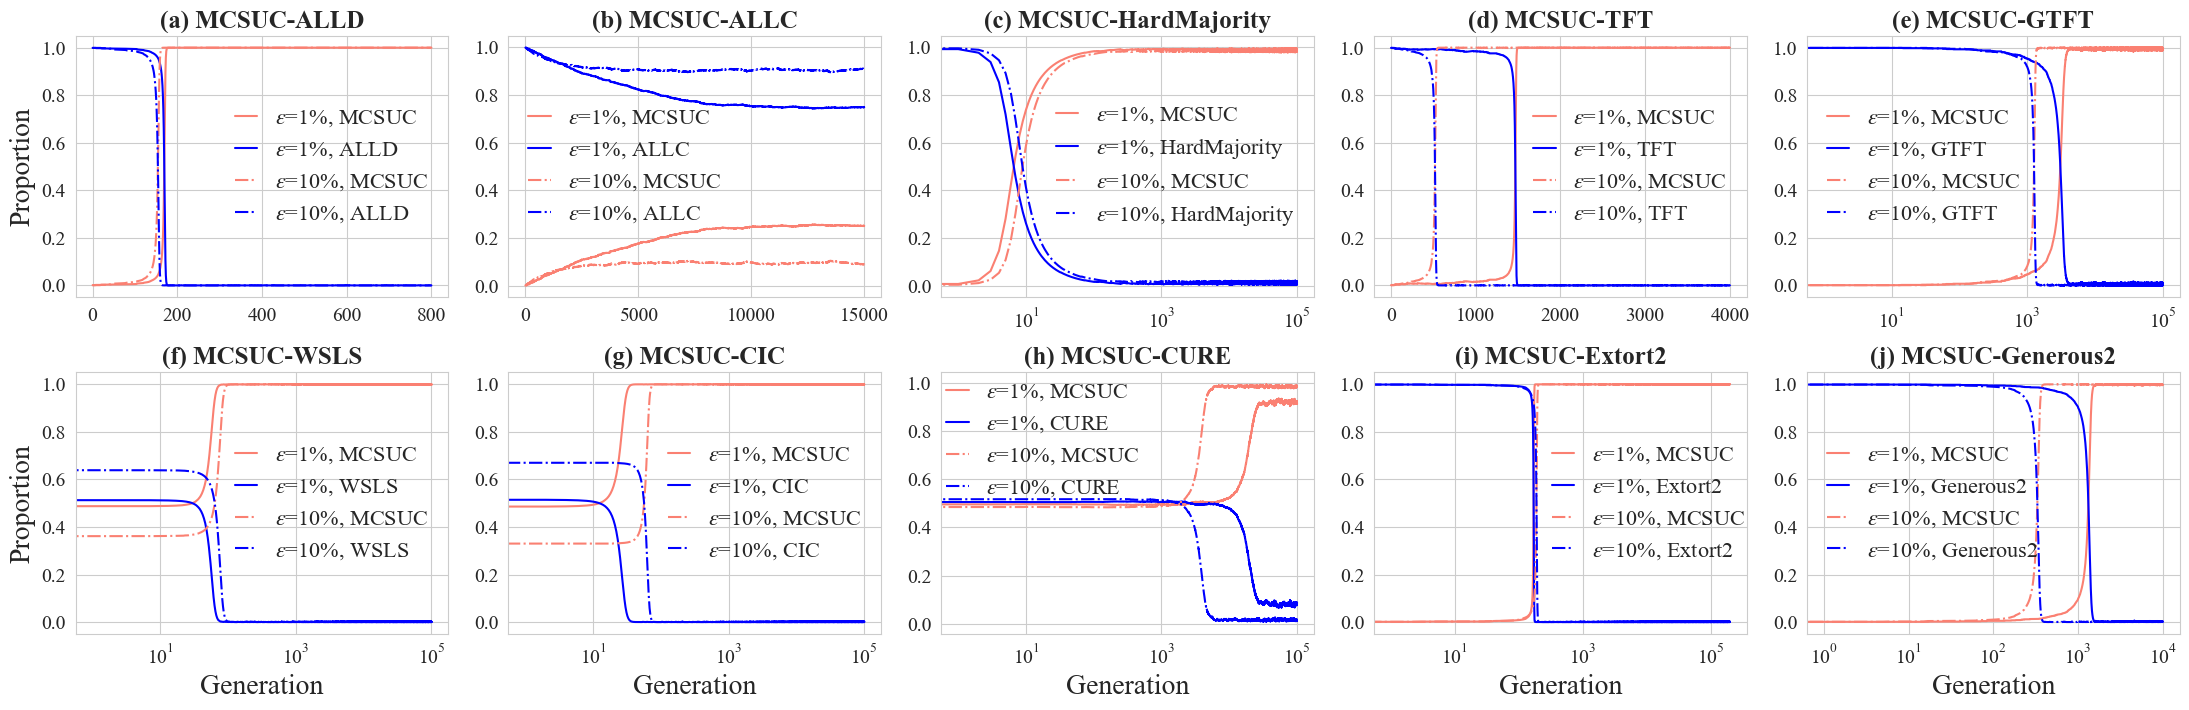

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Times New Roman')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def plot_subplot(ax, name, step, is_log=True, error001999=False, subplot_label=''):
    error01_data = np.loadtxt("./databefore/MCCURE_vs_" + name + "_error=0.1.csv", delimiter=',')
    error001_data = np.loadtxt("./databefore/MCCURE_vs_" + name + "_error=0.01.csv", delimiter=',')
    
    if name == 'Generous_independent':
        name = 'Generous2'
    elif name == 'Extort2_independent':
        name = 'Extort2'

    x = [i for i in range(step + 1)]

    ax.plot(x, error001_data[:step + 1, 0], label=r"$\epsilon$=1%, MCSUC", color='salmon', linewidth=1.5)
    ax.plot(x, error001_data[:step + 1, 1], label=r"$\epsilon$=1%, " + name, color='blue', linewidth=1.5)
    ax.plot(x, error01_data[:step + 1, 0], label=r"$\epsilon$=10%, MCSUC", color='salmon', linestyle='-.', linewidth=1.5)
    ax.plot(x, error01_data[:step + 1, 1], label=r"$\epsilon$=10%, " + name, color='blue', linestyle='-.', linewidth=1.5)

    if is_log:
        ax.set_xscale('log')
    ax.set_xlabel("Generation", fontsize=20)
    ax.set_ylabel("Proportion", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14)

    if subplot_label in ['(a) MCSUC-ALLD', '(c) MCSUC-HardMajority', '(d) MCSUC-TFT','(f) MCSUC-WSLS','(g) MCSUC-CIC']:
        ax.legend(loc='center right', prop={'size':16},frameon=False,handlelength=1.0)
    elif subplot_label in ['(i) MCSUC-Extort2']:
        ax.legend(loc='center right', prop={'size':16},frameon=False,handlelength=1.0, bbox_to_anchor=(1.05, 0.5))
    elif subplot_label in ['(h) MCSUC-CURE']:
        ax.legend(loc='upper left', prop={'size':16},frameon=False,handlelength=1.0,bbox_to_anchor=(-0.04, 1.04))
    else:
        ax.legend(loc='center left', prop={'size':16},frameon=False,handlelength=1.0)

    if subplot_label in ['(b) MCSUC-ALLC', '(c) MCSUC-HardMajority', '(d) MCSUC-TFT', '(e) MCSUC-GTFT', '(g) MCSUC-CIC','(h) MCSUC-CURE','(i) MCSUC-Extort2','(j) MCSUC-Generous2']:
        ax.set_ylabel('') 

    if subplot_label in ['(a) MCSUC-ALLD', '(b) MCSUC-ALLC', '(c) MCSUC-HardMajority', '(d) MCSUC-TFT', '(e) MCSUC-GTFT']:
        ax.set_xlabel('') 
    ax.set_title(subplot_label, fontsize=18, loc='center')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22, 7.2)) 

plot_subplot(axes[0, 0], 'ALLD', 800, is_log=False, subplot_label='(a) MCSUC-ALLD')
plot_subplot(axes[0, 1], 'ALLC', 15000, is_log=False, error001999=True, subplot_label='(b) MCSUC-ALLC')
plot_subplot(axes[0, 2], 'HardMajority', 100000, is_log=True, subplot_label='(c) MCSUC-HardMajority')
plot_subplot(axes[0, 3], 'TFT', 4000, is_log=False, subplot_label='(d) MCSUC-TFT')
plot_subplot(axes[0, 4], 'GTFT', 100000, is_log=True, subplot_label='(e) MCSUC-GTFT')
plot_subplot(axes[1, 0], 'WSLS', 100000, is_log=True, subplot_label='(f) MCSUC-WSLS')
plot_subplot(axes[1, 1], 'CIC', 100000, is_log=True, subplot_label='(g) MCSUC-CIC')

plot_subplot(axes[1, 2], 'CURE2', 100000, is_log=True, subplot_label='(h) MCSUC-CURE')  
plot_subplot(axes[1, 3], 'Extort2_independent', 200000, is_log=True, subplot_label='(i) MCSUC-Extort2') 
plot_subplot(axes[1, 4], 'Generous_independent', 10000, is_log=True, subplot_label='(j) MCSUC-Generous2') 

plt.tight_layout()
plt.savefig('./figure/1v1.pdf', format="pdf", bbox_inches='tight', dpi=900)
plt.show()
